# Наивный байесовский классификатор

# Содержание работы

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
X = data.data[:,:2]
y = data.target

df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

Text(0, 0.5, 'X2')

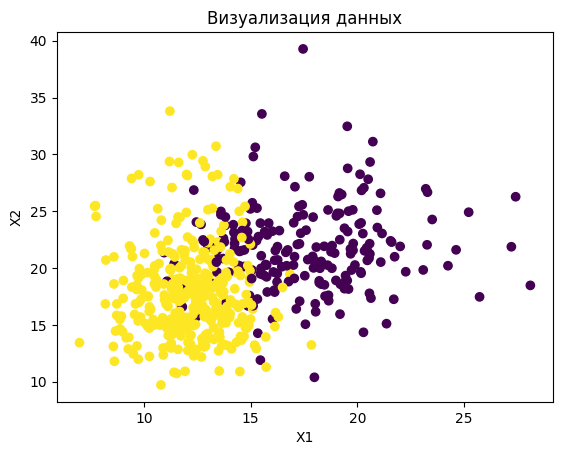

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

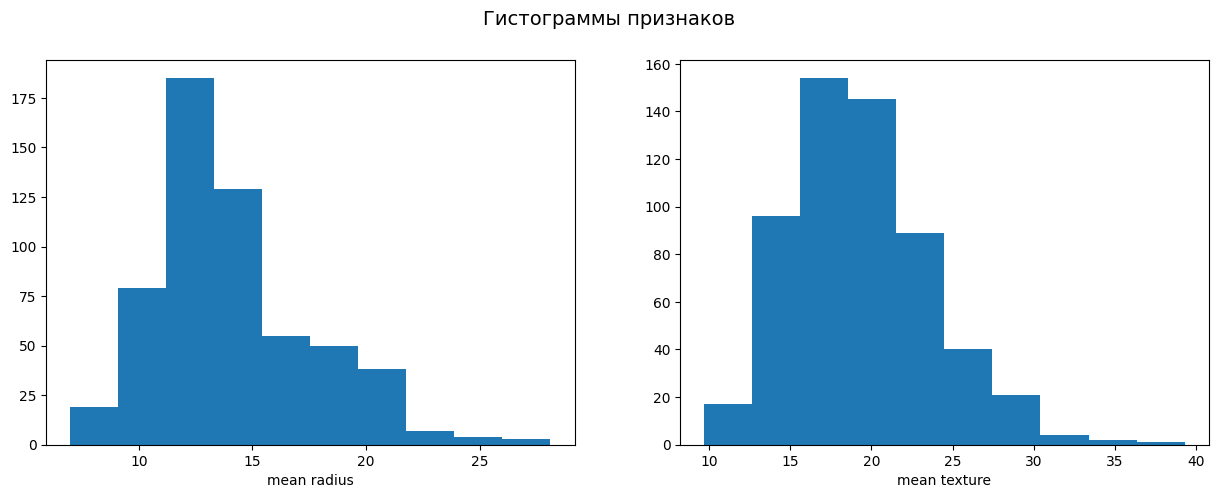

In [10]:
plt.figure(figsize=(15, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [11]:
from sklearn.naive_bayes import GaussianNB


gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)

GaussianNB()

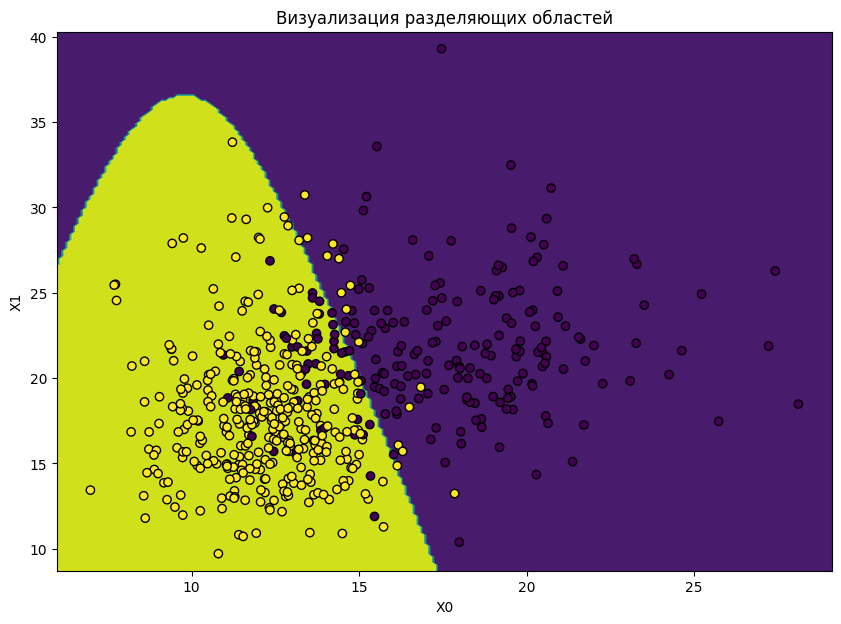

In [18]:
X0 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200)
X1 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 200)

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
Z = gaussian_nb.predict(XX).reshape(X0_grid.shape)


plt.figure(figsize=(10, 7))
plt.contourf(X0_grid, X1_grid, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')


plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Визуализация разделяющих областей")
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


y_pred = gaussian_nb.predict(X)

print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.9127516778523489


In [20]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [21]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917468


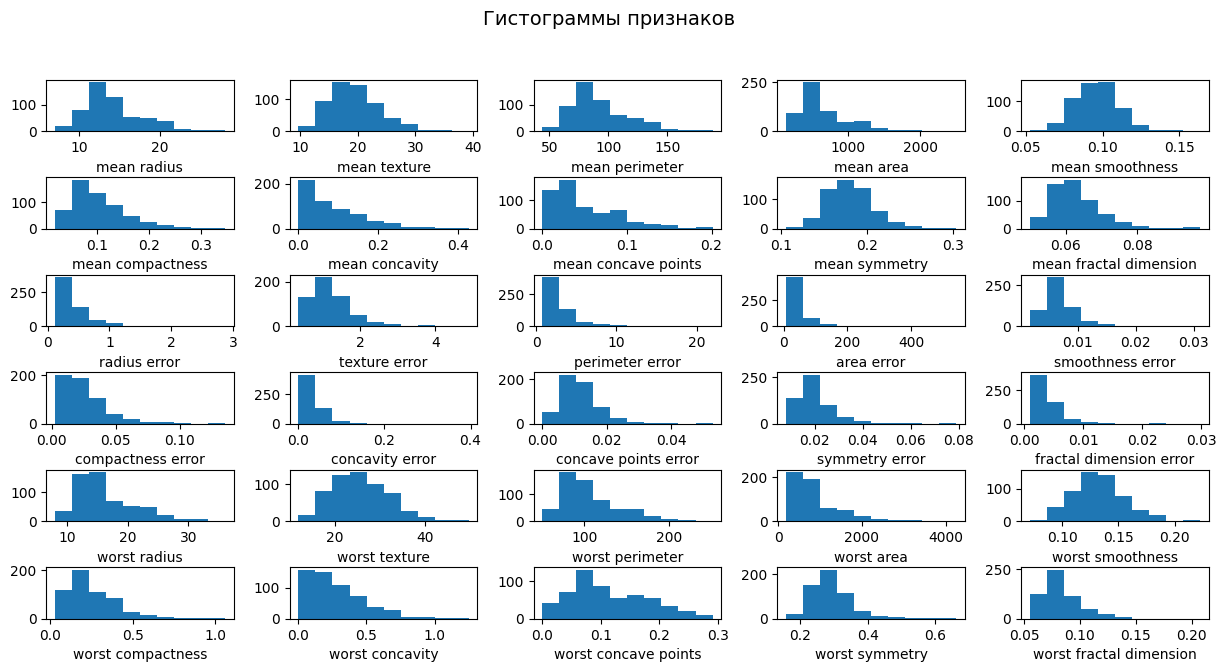

In [22]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [25]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df = df.drop(['mean concavity','radius error', 
              'perimeter error', 'area error', 
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area', 
              'worst concavity'], 
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678,0


In [31]:
X = df.drop("target", axis=1)
y = df["target"]

gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566


# Задания для самостоятельной работы

### 1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [33]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer


data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df = df.drop(['mean concavity','radius error', 
              'perimeter error', 'area error', 
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area', 
              'worst concavity'], 
             axis=1)

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "CategoricalNB": CategoricalNB()
}

for name, model in models.items():
    try:
        # Для CategoricalNB дискретизируем данные
        if name == "CategoricalNB":
            discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
            X_train_cat = discretizer.fit_transform(X_train)
            X_test_cat = discretizer.transform(X_test)
            model.fit(X_train_cat, y_train)
            y_pred = model.predict(X_test_cat)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        print(f"{name}: Accuracy = {acc:.4f}")
    except Exception as e:
        print(f"{name}: Not applicable. Reason: {e}")

MultinomialNB: Accuracy = 0.8531
BernoulliNB: Accuracy = 0.6224
ComplementNB: Accuracy = 0.8462
CategoricalNB: Accuracy = 0.9510


**MultinomialNB**: Предполагает, что признаки являются счетными (целые неотрицательные числа). Для breast_cancer данные вещественные (float), так что модель работает, но не идеально подходит.

**BernoulliNB**: Ожидает бинарные признаки (0 или 1). Без предварительной бинаризации работает хуже. Применимость ограничена без дополнительной подготовки данных.

**ComplementNB**: Улучшенная версия MultinomialNB для несбалансированных классов. Лучше работает на тексте, но на breast_cancer показывает приемлемые результаты, хотя специально не предназначен для вещественных признаков.

**CategoricalNB**: Требует категориальных (дискретных) данных. После дискретизации (разбиения на бины) применим, но потеря информации может ухудшить точность. Подходит только при правильной подготовке данных.

### 2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [35]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.6%20bayes/data/titanic.csv")

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report

X = data.drop(['Survived'], axis=1)  
y = data['Survived']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)
accuracy_cnb = accuracy_score(y_test, y_pred_cnb)


print(f"Accuracy для GaussianNB: {accuracy_gnb:.4f}")
print(f"Accuracy для BernoulliNB: {accuracy_bnb:.4f}")
print(f"Accuracy для MultinomialNB: {accuracy_mnb:.4f}")
print(f"Accuracy для ComplementNB: {accuracy_cnb:.4f}")

print("\nClassification report для GaussianNB:")
print(classification_report(y_test, y_pred_gnb))

print("\nClassification report для BernoulliNB:")
print(classification_report(y_test, y_pred_bnb))

print("\nClassification report для MultinomialNB:")
print(classification_report(y_test, y_pred_mnb))

print("\nClassification report для ComplementNB:")
print(classification_report(y_test, y_pred_cnb))

Accuracy для GaussianNB: 0.7709
Accuracy для BernoulliNB: 0.7709
Accuracy для MultinomialNB: 0.7765
Accuracy для ComplementNB: 0.7598

Classification report для GaussianNB:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       105
           1       0.70      0.77      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179


Classification report для BernoulliNB:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       105
           1       0.69      0.80      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179


Classification report для MultinomialNB:
              precision    recall  f1-score   support

           0       0.81      0.81   

### 3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('train.csv')
train = data.drop(columns=["Name", "Ticket", "Cabin"])

train.fillna(train.median(), inplace=True)

# Преобразуем категориальные переменные в числовые с помощью OneHotEncoder
categorical_columns = ['Sex', 'Embarked', 'Pclass']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(train[categorical_columns])


X = pd.concat([train.drop(columns=categorical_columns + ['Survived']), 
               pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))], axis=1)
y = train['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy для GaussianNB: {accuracy:.4f}")
print("\nClassification report для GaussianNB:")
print(classification_report(y_test, y_pred))


Accuracy для GaussianNB: 0.7318

Classification report для GaussianNB:
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       105
           1       0.84      0.43      0.57        74

    accuracy                           0.73       179
   macro avg       0.77      0.69      0.69       179
weighted avg       0.76      0.73      0.71       179



/tmp/ipykernel_31527/2575586442.py:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.median(), inplace=True)
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Контрольные вопросы

**Какие условия должны выполняться в данных, чтобы можно было применять наивную байесовскую модель?**  
Фичи должны быть независимыми друг от друга, а признаки быть корректно распределены для выбранного типа модели.

**Какие виды непрерывных распределений существуют и наиболее распространены?**  
Нормальное, экспоненциальное, гамма-распределение, лог-нормальное.

**Как определить вид распределения численной переменной в датасете?**  
Построить гистограмму, использовать тесты Шапиро-Уилка, Андерсона-Дарлинга или К-средний.

**Как наивная байесовская модель работает с категориальными признаками?**  
Оценивает вероятность категорий по частотам появления в данных.

**Зачем при применении наивного байесовского классификатора может понадобиться анализировать форму эмпирического распределения признаков?**  
Чтобы выбрать подходящий вариант наивного Байеса: Gaussian, Multinomial, Bernoulli или Categorical.

**В чем особенность модели категориального наивного Байеса?**  
Работает с категориальными признаками без преобразования в one-hot, используя частоты категорий напрямую.
